<h1> Detecting Malaria Using Convolution Neural Network</h1>
<p></p>
<p> The dataset is taken from <a href="https://www.kaggle.com/iarunava/cell-images-for-detecting-malaria">Kaggle</a></p>
    
<p>    The dataset consists of 27,588 images belonging to two separate classes:   The number of images per class is equally       distributed with 13,794 images per each respective class. </p>
<p>    Parasitized: Implying that the region contains malaria.
<p>   Uninfected: Meaning there is no evidence of malaria in the region.</p>


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint,EarlyStopping

Using TensorFlow backend.


In [2]:
cd cell_images

C:\Users\Umang\Desktop\Deep Learning projects\malaria class\cell_images


In [3]:
features = np.load("Features.npy")
labels = np.load("Labels.npy")

In [4]:
print('Featuress : {} | labels : {}'.format(features.shape , labels.shape))

Featuress : (110232, 50, 50, 3) | labels : (110232,)


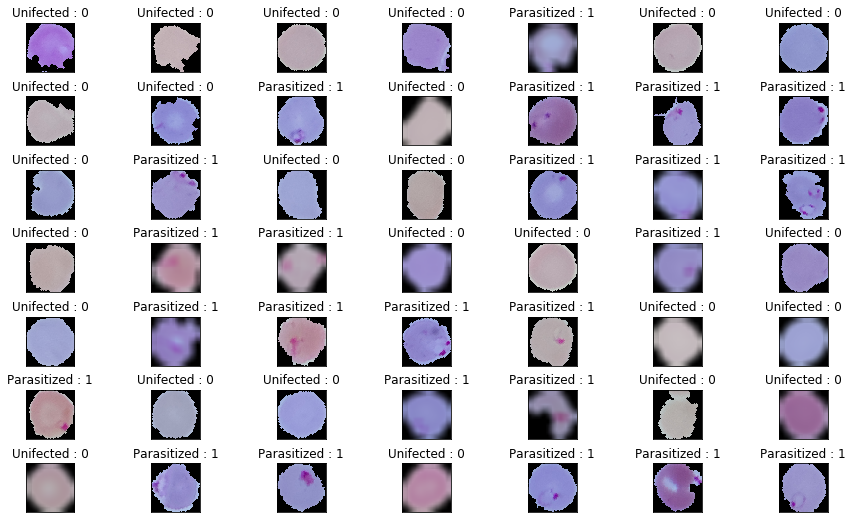

In [5]:
plt.figure(1 , figsize = (15 , 9))
n = 0 
for i in range(49):
    n += 1 
    r = np.random.randint(0 , features.shape[0] , 1)
    plt.subplot(7 , 7 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    plt.imshow(features[r[0]])
    plt.title('{} : {}'.format('Parasitized' if labels[r[0]] == 1 else 'Unifected' ,
                               labels[r[0]]) )
    plt.xticks([]) , plt.yticks([])
    
plt.show()

In [6]:
features = features.astype('float32')
features = features / 255

In [7]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(features , labels , 
                                            test_size = 0.20 ,
                                            random_state = 111)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print('X_trains shape {} ,X_test shape {}'.format(X_train.shape,X_test.shape))
print('y_trains shape{}, y_tests shape {}'.format(y_train.shape, y_test.shape))

X_trains shape (88185, 50, 50, 3) ,X_test shape (22047, 50, 50, 3)
y_trains shape(88185, 2), y_tests shape (22047, 2)


<h1>Convolution Model</h1>

In [8]:
#training the model
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size=3, padding = "same", activation = 'relu', input_shape = (50,50,3)))
model.add(Conv2D(filters = 64, kernel_size=3, padding = "valid", activation = 'relu'))
model.add(Conv2D(filters = 16, kernel_size=5, padding = "same", activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))

model.add(Conv2D(filters = 5, kernel_size=3, padding = "same", activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))

model.add(Flatten())

model.add(Dense(2048, activation = 'relu'))
model.add(Dense(1024, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 50, 50, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 64)        18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 16)        25616     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 5)         725       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 5)         0         
_________________________________________________________________
flatten (Flatten)            (None, 720)               0

In [9]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

history = model.fit(X_train, y_train, batch_size= 256, epochs= 6, verbose=1)

Train on 88185 samples
Epoch 1/6
88185/88185 [==============================] - 944s 11ms/sample - loss: 0.2832 - accuracy: 0.8708
Epoch 2/6
88185/88185 [==============================] - 851s 10ms/sample - loss: 0.1470 - accuracy: 0.9495
Epoch 3/6
88185/88185 [==============================] - 849s 10ms/sample - loss: 0.1261 - accuracy: 0.9565
Epoch 4/6
88185/88185 [==============================] - 845s 10ms/sample - loss: 0.1123 - accuracy: 0.9608
Epoch 5/6
88185/88185 [==============================] - 854s 10ms/sample - loss: 0.0980 - accuracy: 0.9657
Epoch 6/6
88185/88185 [==============================] - 1014s 11ms/sample - loss: 0.0876 - accuracy: 0.9695


In [10]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


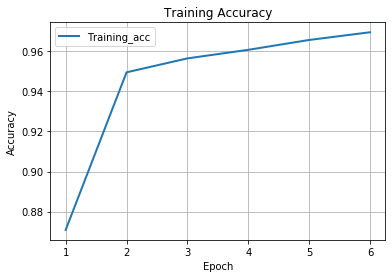

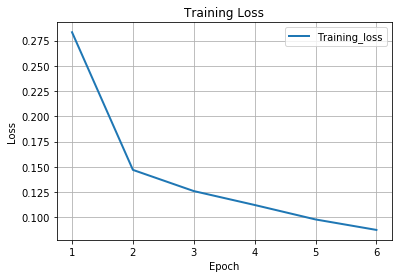

In [11]:
#WE are using the History.history which calculates the loss and accuraccy per epochs so only 6
#we can use the callback to get a more pleasing graph where loss and accuracy can be recorder per batch
accuracy = history.history['accuracy']
loss = history.history['loss']

epochs=range(1,len(accuracy)+1)
plt.plot(epochs, accuracy, label="Training_acc",linewidth=2)
plt.title('Training Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()
plt.figure()

plt.plot(epochs, loss, label="Training_loss",linewidth=2)
plt.title('Training Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()

plt.style.use('seaborn-bright')

<h1> Testing </h1>

In [12]:
predictions = model.evaluate(X_test, y_test)

22047/22047 [==============================] - 136s 6ms/sample - loss: 0.1406 - accuracy: 0.9571


Actual: [0. 1.]
Predicted [[1.0669816e-09 1.0000000e+00]]


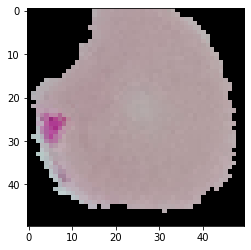

In [14]:
index = 120
plt.imshow(X_test[index].reshape(50, 50, 3))
print("Actual:", y_test[index])
print("Predicted", model.predict([[X_test[index]]]))